In [1]:
# importing packages

import numpy as np
import os
import time
from dask import dataframe as dd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import vitaldb
import csv
from datetime import datetime, time as datetime_time, timedelta
import glob
import sys
import sklearn.neighbors._base
import vitaldb
import itertools

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)

In [3]:
def getRootDir():
    """
    Get root folder directory
    :return: root folder directory
    :rtype: path
    """
    rootdir = os.path.abspath(os.curdir)

    return rootdir
rootdir = getRootDir()
rootdir

'/Users/tselanna/Desktop/Code'

In [4]:
# Import dataset
df = glob.glob(os.path.join(
        rootdir, 'TOSHIBA_HDD/2022_07_15T18_01_25_ANALYSIS_DF_44var.csv'))
df = pd.read_csv(df[0], dtype={"Solar8000/BT": float})

In [5]:
 ids = [21,   30,   50,   57,   62,  109,  116,  124,  140,  166,  194,
        211,  220,  224,  239,  269,  305,  313,  320,  323,  351,  384,
        446,  465,  483,  487,  498,  501,  503,  534,  548,  606,  608,
        612,  613,  616,  651,  653,  664,  681,  687,  696,  707,  739,
        755,  782,  799,  801,  832,  927,  930,  937,  958,  975,  978,
        982, 1026, 1081, 1082, 1104, 1130, 1134, 1137, 1167, 1175, 1189,
       1201, 1210, 1214, 1236, 1255, 1308, 1315, 1359, 1378, 1401, 1405,
       1421, 1422, 1434, 1435, 1450, 1453, 1467, 1476, 1479, 1502, 1508,
       1526, 1562, 1591, 1655, 1666, 1694, 1718, 1721, 1731, 1741, 1742,
       1766, 1788, 1796, 1803, 1813, 1824, 1854, 1859, 1873, 1880, 1928,
       1934, 1993, 2037, 2082, 2100, 2104, 2108, 2126, 2201, 2215, 2229,
       2235, 2255, 2302, 2308, 2343, 2345, 2346, 2351, 2362, 2363, 2371,
       2389, 2407, 2430, 2431, 2462, 2475, 2496, 2506, 2517, 2551, 2565,
       2567, 2570, 2624, 2630, 2707, 2754, 2767, 2779, 2792, 2800, 2805,
       2820, 2825, 2829, 2842, 2881, 2885, 2921, 2930, 2936, 2937, 2953,
       2989, 3048, 3052, 3059, 3079, 3110, 3163, 3183, 3195, 3213, 3224,
       3234, 3253, 3254, 3265, 3302, 3326, 3356, 3358, 3382, 3397, 3398,
       3413, 3427, 3449, 3480, 3531, 3535, 3546, 3547, 3552, 3557, 3562,
       3597, 3620, 3621, 3624, 3638, 3656, 3677, 3678, 3684, 3713, 3732,
       3764, 3779, 3780, 3786, 3801, 3851, 3893, 3914, 3920, 3961, 4028,
       4057, 4075, 4087, 4097, 4114, 4154, 4160, 4229, 4248, 4249, 4257,
       4288, 4303, 4326, 4334, 4363, 4375, 4378, 4383, 4395, 4432, 4437,
       4451, 4456, 4469, 4482, 4491, 4517, 4608, 4646, 4670, 4688, 4709,
       4735, 4770, 4773, 4775, 4826, 4840, 4848, 4850, 4874, 4897, 4912,
       4925, 4948, 4962, 4970, 4972, 5011, 5013, 5032, 5041, 5046, 5050,
       5086, 5087, 5115, 5128, 5130, 5139, 5140, 5167, 5187, 5198, 5211,
       5215, 5229, 5263, 5279, 5295, 5361, 5387, 5395, 5402, 5423, 5469,
       5494, 5506, 5516, 5566, 5568, 5570, 5600, 5627, 5631, 5639, 5644,
       5672, 5700, 5731, 5742, 5756, 5786, 5798, 5821, 5828, 5834, 5879,
       5881, 5900, 5911, 5913, 5927, 5935, 5960, 5968, 5984, 6001, 6023,
       6036, 6045, 6116, 6137, 6146, 6210, 6214, 6225, 6226, 6253, 6263,
       6272, 6294, 6317, 6325, 6352, 6356, 6360]

In [6]:
len(ids)

348

In [8]:
isin = df.loc[df['caseid'].isin(ids)]

In [9]:
# shrink dataset to the first 6 cases 
caseids = isin.caseid.unique()
caseids


array([  21,   30,   50,   57,   62,  109,  116,  124,  140,  166,  194,
        211,  220,  224,  239,  269,  305,  313,  320,  323,  351,  384,
        446,  465,  483,  487,  498,  501,  503,  534,  548,  606,  608,
        612,  613,  616,  651,  653,  664,  681,  687,  696,  707,  739,
        755,  782,  799,  801,  832,  927,  930,  937,  958,  975,  978,
        982, 1026, 1081, 1082, 1104, 1130, 1134, 1137, 1167, 1175, 1189,
       1201, 1210, 1214, 1236, 1255, 1308, 1315, 1359, 1378, 1401, 1405,
       1421, 1422, 1434, 1435, 1450, 1453, 1467, 1476, 1479, 1502, 1508,
       1526, 1562, 1591, 1655, 1666, 1694, 1718, 1721, 1731, 1741, 1742,
       1766, 1788, 1796, 1803, 1813, 1824, 1854, 1859, 1873, 1880, 1928,
       1934, 1993, 2037, 2082, 2100, 2104, 2108, 2126, 2201, 2215, 2229,
       2235, 2255, 2302, 2308, 2343, 2345, 2346, 2351, 2362, 2363, 2371,
       2389, 2407, 2430, 2431, 2462, 2475, 2496, 2506, 2517, 2551, 2565,
       2567, 2570, 2624, 2630, 2707, 2754, 2767, 27

In [10]:
# only keep MBP variable
data = isin[["Solar8000/NIBP_MBP", 'caseid']].copy()

## Preprocessing

In [11]:
MINUTES_AHEAD = 5  # Predict hypotension 5 minutes ahead
LSTM_NODES = 16  # Number of cells in LSTM
BATCH_SIZE = 100  # Batch size for learning
MAX_CASES = 600  # Maximum number of cases for this example

In [23]:
# Final dataset for training and testing the model
x = []  # input with shape of (segements, timepoints)
y = []  # output with shape of (segments)
valid_mask = []  # validity of each segement
c = []  # caseid of each segment

# maximum number of cases
for caseid in caseids:
    print(f'loading {caseid}', end='...', flush=True)

    # read the mean blood pressure 

    a = data.loc[data.caseid.eq(caseid)]
    b = a[['Solar8000/NIBP_MBP']].values.tolist()
    mbps= list(itertools.chain.from_iterable(b))
    

    # removing the nan values at the beginning and the ending
    case_valid_mask = ~np.isnan(mbps)
    case_sample = 0
    case_event = 0
    for i in range(0, len(mbps) - (250 + MINUTES_AHEAD * 30 + 30)):
        segx = mbps[i:i + 250]
        segy = mbps[i + 250 + MINUTES_AHEAD * 30:i + 250 + MINUTES_AHEAD * 30 + 30]
        
        valid = True
        if np.isnan(segx).mean() > 0.1:
            valid = False
        if np.isnan(segy).mean() > 0.1:
            valid = False
        elif (np.abs(np.diff(segx)) > 50).any():  # abrupt change -> noise
            valid = False
        elif (np.abs(np.diff(segy)) > 50).any():  # abrupt change -> noise
            valid = False
        
        valid_mask.append(valid)
        evt = np.nanmax(segy) < 65
        x.append(segx)
        y.append(evt)
        c.append(caseid)
        
        if evt:
            case_event += 1
   
        if valid:
            case_sample += 1
            if evt:
                case_event += 1
    
    if case_sample > 0:
        print("{} samples {} ({:.1f} %) events".format(case_sample, case_event, 100*case_event/case_sample))
    else:
        print('no samples')

    if len(np.unique(c)) >= MAX_CASES:
        break

# final caseids
caseids = np.unique(c)

x = np.array(x)
y = np.array(y) 
valid_mask = np.array(valid_mask)
c = np.array(c)

# forward filling
x = pd.DataFrame(x).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values

x = x[...,None]  # add 3rd axis for input of LSTM

print(x.shape)
print(y.shape)

loading 21...5452 samples 0 (0.0 %) events
loading 30...4775 samples 2482 (52.0 %) events
loading 50...1571 samples 734 (46.7 %) events
loading 57...4510 samples 936 (20.8 %) events
loading 62...4287 samples 82 (1.9 %) events
loading 109...6490 samples 0 (0.0 %) events
loading 116...477 samples 4 (0.8 %) events
loading 124...1369 samples 0 (0.0 %) events
loading 140...2218 samples 0 (0.0 %) events
loading 166...2350 samples 1086 (46.2 %) events
loading 194...3124 samples 80 (2.6 %) events
loading 211...3929 samples 0 (0.0 %) events
loading 220...3513 samples 636 (18.1 %) events
loading 224...2707 samples 0 (0.0 %) events
loading 239...1722 samples 0 (0.0 %) events
loading 269...1330 samples 0 (0.0 %) events
loading 305...4626 samples 0 (0.0 %) events
loading 313...4176 samples 0 (0.0 %) events
loading 320...3833 samples 96 (2.5 %) events
loading 323...1753 samples 1356 (77.4 %) events
loading 351...5737 samples 1128 (19.7 %) events
loading 384...53 samples 0 (0.0 %) events
loading 446.

## Splitting samples into training and testing dataset

In [24]:
ncase = len(caseids)
ntest = int(ncase * 0.2)
ntrain = ncase - ntest
caseids_train = caseids[:ntrain]
caseids_test = caseids[ncase - ntest:ncase]

# train set test set 
train_mask = np.isin(c, caseids_train)
test_mask = np.isin(c, caseids_test)

# invalid samples in test dataset is also needed for plotting
test_x = x[test_mask]
test_y = y[test_mask]
test_c = c[test_mask]

# only valid samples are required for the training dataset
train_x_valid = x[train_mask]
train_y_valid = y[train_mask]
test_x_valid = x[test_mask]
test_y_valid = y[test_mask]

testname = '{}cases {}ahead batchsize={} total {}, train {} ({} events {:.1f}%), test {} ({} events {:.1f}%)'.format(MAX_CASES, MINUTES_AHEAD, BATCH_SIZE, len(y), len(train_y_valid), sum(train_y_valid), 100*np.mean(train_y_valid), len(test_y_valid), sum(test_y_valid), 100*np.mean(test_y_valid))
testname

'600cases 5ahead batchsize=100 total 1246263, train 985350 (63544 events 6.4%), test 260913 (11985 events 4.6%)'

## Model building and training

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import Model, load_model
from keras.layers import Dense, LSTM, Input, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [26]:
# making output folder
tempdir = 'output'
if not os.path.exists(tempdir):
    os.mkdir(tempdir)
weight_path = tempdir + "/weights.hdf5"

# build a model
model = Sequential()
model.add(LSTM(LSTM_NODES, input_shape=x.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC()])
hist = model.fit(train_x_valid, train_y_valid, validation_split=0.1, epochs=100, batch_size=BATCH_SIZE, class_weight={0:1, 1:5},
                 callbacks=[ModelCheckpoint(monitor='val_loss', filepath=weight_path, verbose=1, save_best_only=True),
                            EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='auto')])

# reload the best model
model.load_weights(weight_path)
open(tempdir + "/model.json", "wt").write(model.to_json())

Epoch 1/100
8869/8869 [==============================] - ETA: 0s - loss: 0.5086 - accuracy: 0.8907 - auc_1: 0.8587
Epoch 1: val_loss improved from inf to 0.22516, saving model to output/weights.hdf5
8869/8869 [==============================] - 965s 108ms/step - loss: 0.5086 - accuracy: 0.8907 - auc_1: 0.8587 - val_loss: 0.2252 - val_accuracy: 0.9256 - val_auc_1: 0.8082
Epoch 2/100
8869/8869 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.8908 - auc_1: 0.8627
Epoch 2: val_loss did not improve from 0.22516
8869/8869 [==============================] - 945s 107ms/step - loss: 0.5019 - accuracy: 0.8908 - auc_1: 0.8627 - val_loss: 0.2498 - val_accuracy: 0.9041 - val_auc_1: 0.8076
Epoch 3/100
8869/8869 [==============================] - ETA: 0s - loss: 0.5005 - accuracy: 0.8898 - auc_1: 0.8635
Epoch 3: val_loss improved from 0.22516 to 0.19451, saving model to output/weights.hdf5
8869/8869 [==============================] - 942s 106ms/step - loss: 0.5005 - accuracy: 0.

2137

## Evaluation of the model performance

In [27]:
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve

In [28]:
# make prediction on the test dataset
test_y_pred = model.predict(test_x_valid).flatten()

precision, recall, thmbps = precision_recall_curve(test_y_valid, test_y_pred)
auprc = auc(recall, precision)

fpr, tpr, thmbps = roc_curve(test_y_valid, test_y_pred)
auroc = auc(fpr, tpr)

thval = 0.5
f1 = f1_score(test_y_valid, test_y_pred > thval)
acc = accuracy_score(test_y_valid, test_y_pred > thval)
tn, fp, fn, tp = confusion_matrix(test_y_valid, test_y_pred > thval).ravel()

testres = 'auroc={:.3f}, auprc={:.3f} acc={:.3f}, F1={:.3f}, PPV={:.1f}, NPV={:.1f}, TN={}, fp={}, fn={}, TP={}'.format(auroc, auprc, acc, f1, tp/(tp+fp)*100, tn/(tn+fn)*100, tn, fp, fn, tp)
print(testres)



8154/8154 [==============================] - 155s 19ms/step
auroc=0.850, auprc=0.208 acc=0.932, F1=0.286, PPV=27.7, NPV=96.6, TN=239659, fp=9269, fn=8436, TP=3549


In [32]:
auroc

0.8495463841400822

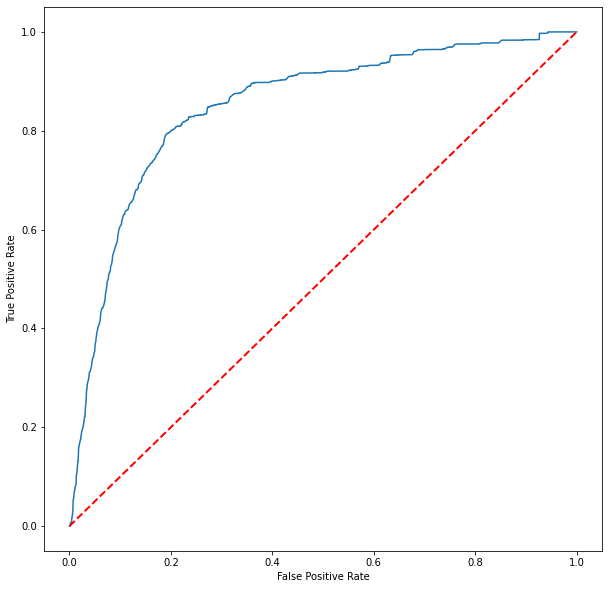

<function matplotlib.pyplot.show(close=None, block=None)>

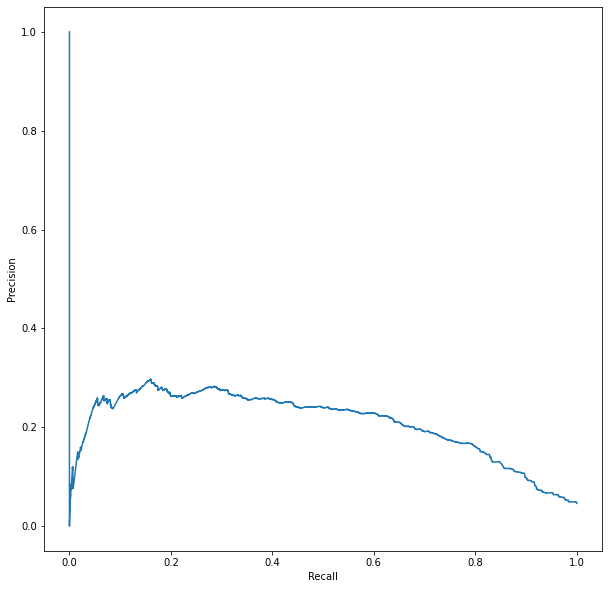

In [33]:
# auroc curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.savefig('{}/auroc.png'.format(tempdir))
# plt.close()
plt.show()

# auprc curve
plt.figure(figsize=(10, 10))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.savefig('{}/auprc.png'.format(tempdir))
# plt.close()
plt.show


## Plotting each case in the test dataset

73/73 [==============================] - 1s 18ms/step
Print error: 5139	0.2434964340524582	


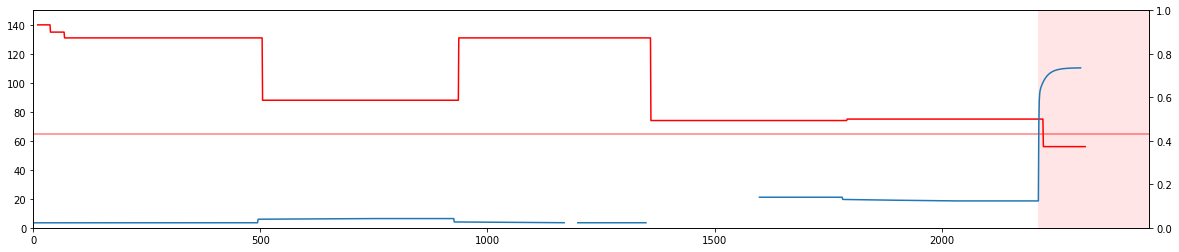

60/60 [==============================] - 1s 15ms/step
Print error: 5140	0.14359718134975794	


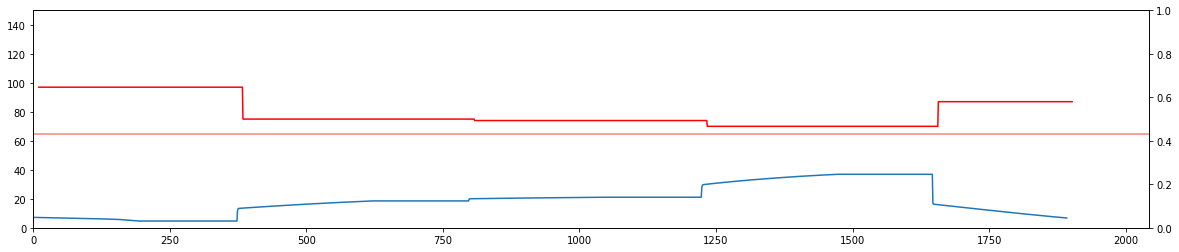

143/143 [==============================] - 2s 16ms/step
Print error: 5167	0.2569465399060992	


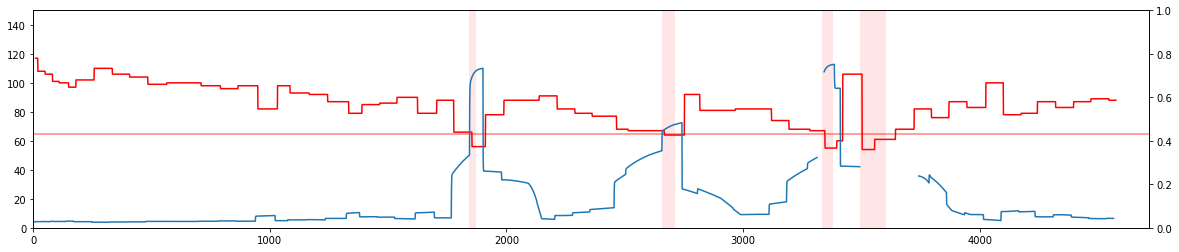

29/29 [==============================] - 1s 17ms/step
Print error: 5187	0.046193440475189446	


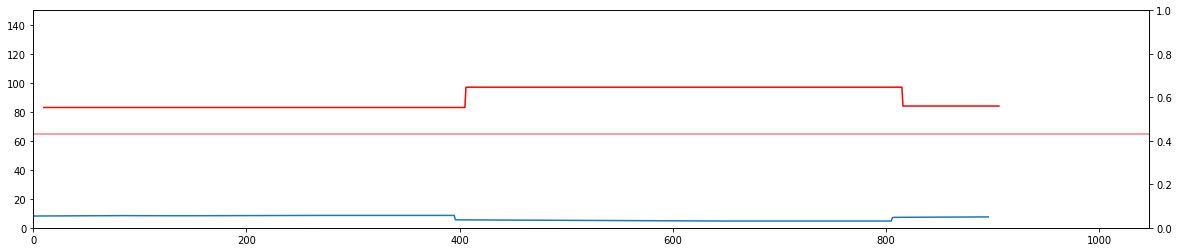

4/4 [==============================] - 0s 17ms/step
Print error: 5198	0.032836086234396406	


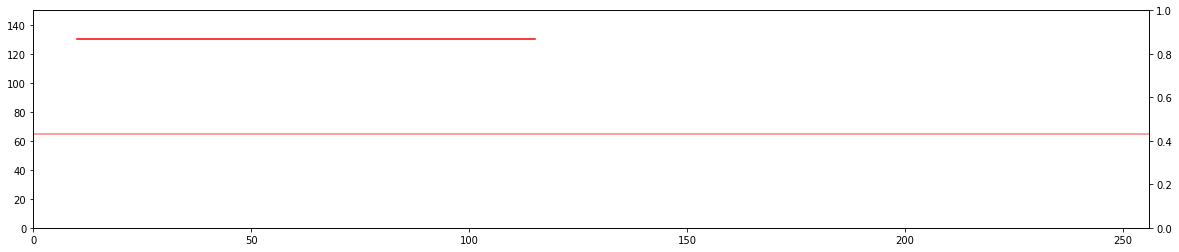

205/205 [==============================] - 3s 16ms/step
Print error: 5211	0.13474193309459775	


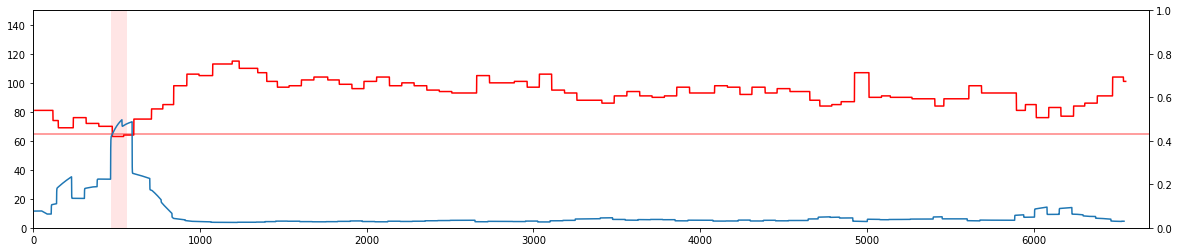

128/128 [==============================] - 2s 15ms/step
Print error: 5215	0.0719467421816392	


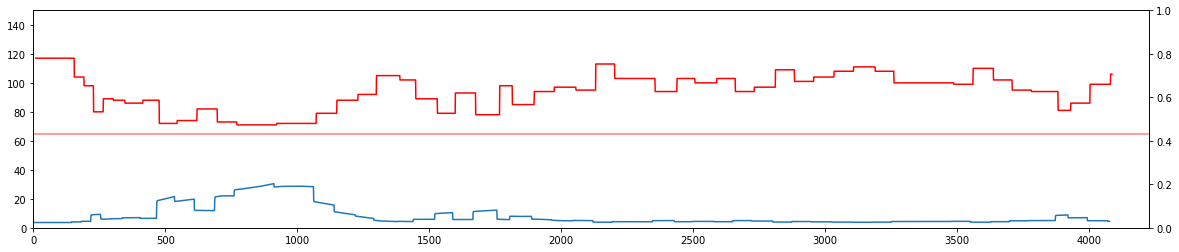

55/55 [==============================] - 1s 16ms/step
Print error: 5229	0.20390236182177945	


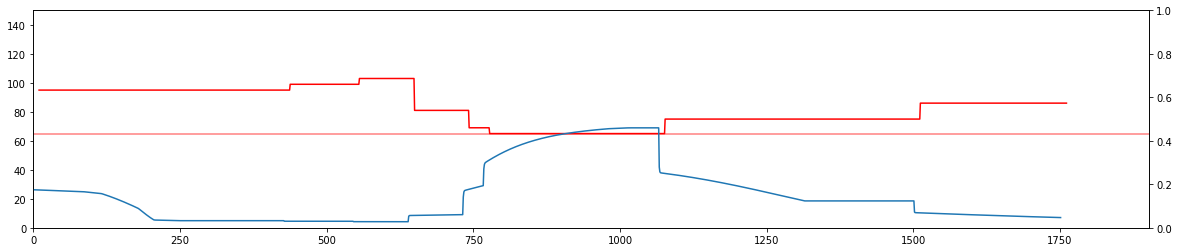

142/142 [==============================] - 2s 15ms/step
Print error: 5263	0.1907319433370244	


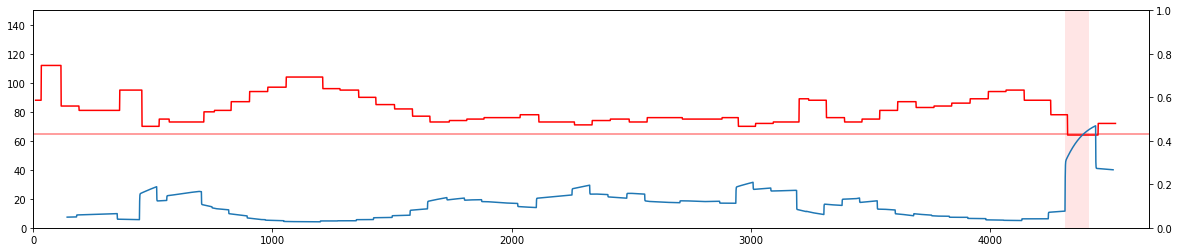

96/96 [==============================] - 2s 16ms/step
Print error: 5279	0.3680323762412442	


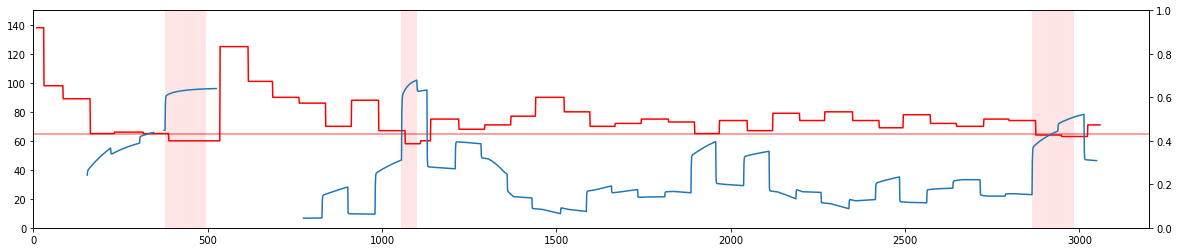

44/44 [==============================] - 1s 16ms/step
Print error: 5295	0.05541649568360764	


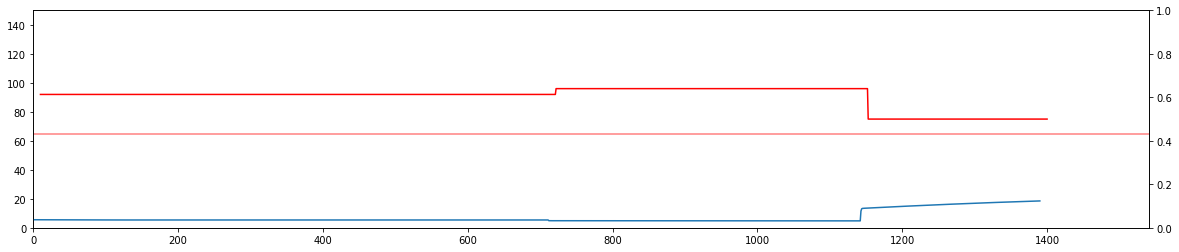

183/183 [==============================] - 3s 16ms/step
Print error: 5361	0.23425940205993817	


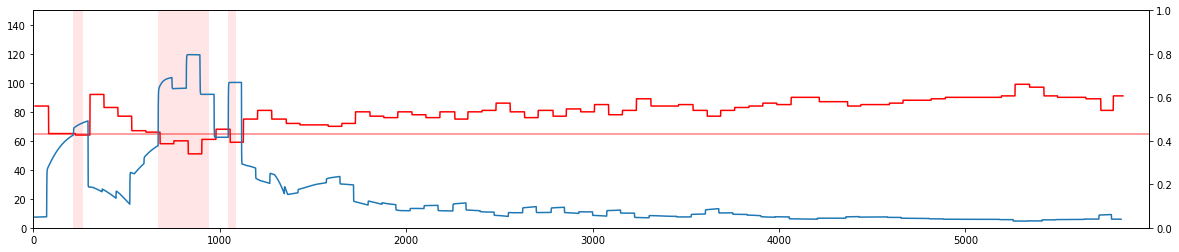

96/96 [==============================] - 1s 15ms/step
Print error: 5387	0.31840505447784745	


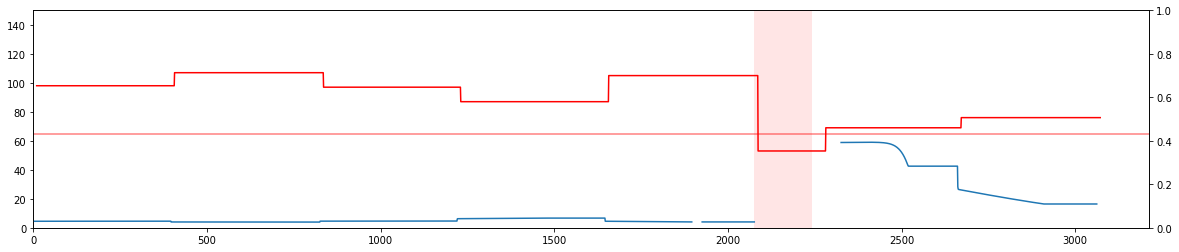

26/26 [==============================] - 1s 20ms/step
Print error: 5395	0.057038053586856846	


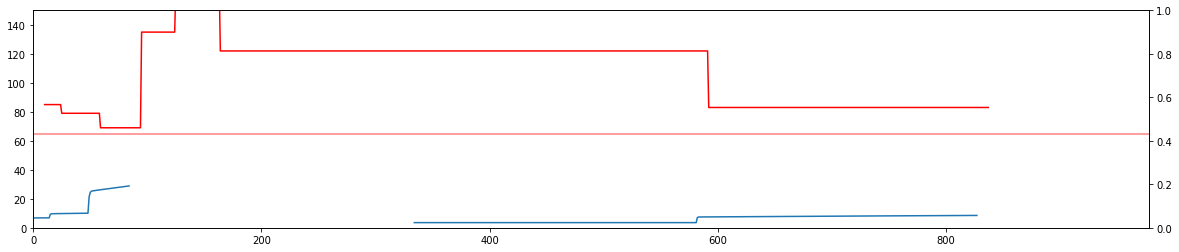

72/72 [==============================] - 1s 16ms/step
Print error: 5402	0.05045640878322207	


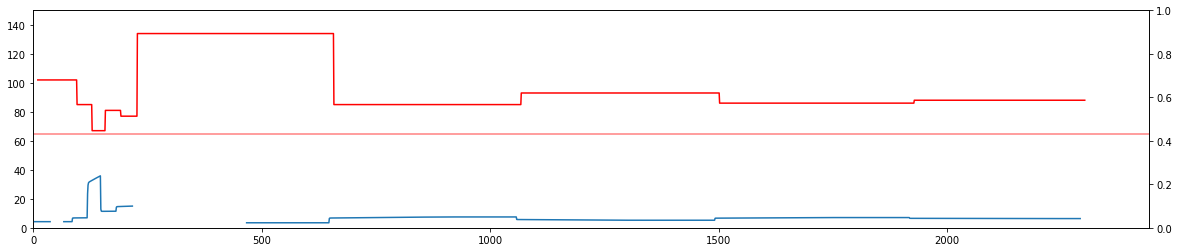

57/57 [==============================] - 1s 16ms/step
Print error: 5423	0.07736395056708766	


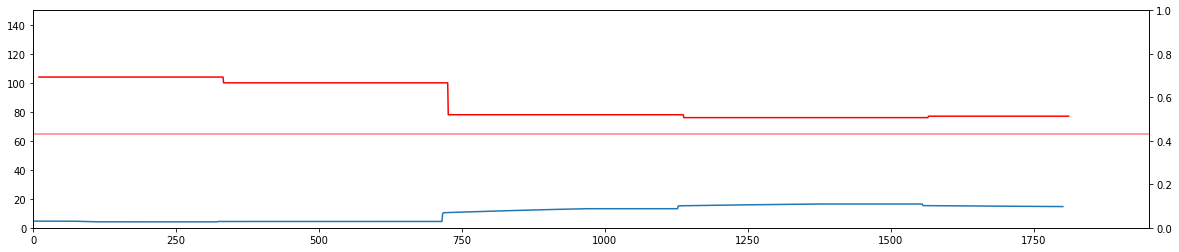

146/146 [==============================] - 2s 16ms/step
Print error: 5469	0.055371397680292804	


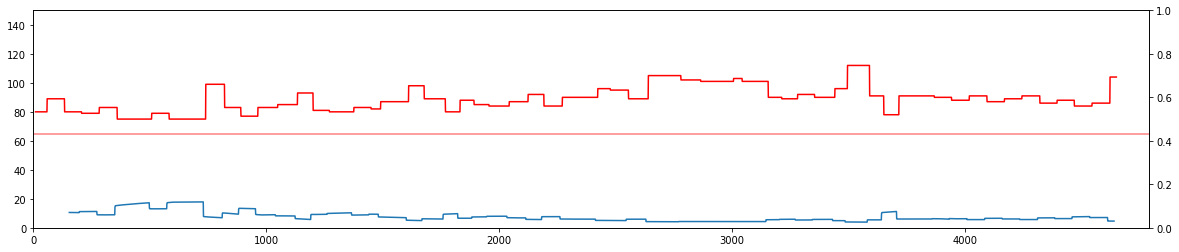

182/182 [==============================] - 3s 15ms/step
Print error: 5494	0.39490097020755266	


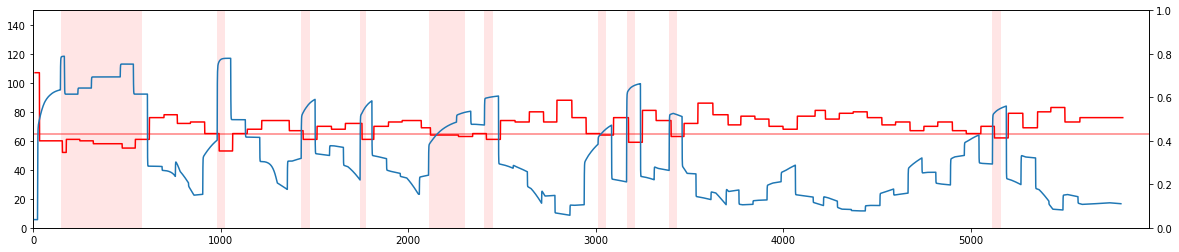

145/145 [==============================] - 2s 16ms/step
Print error: 5506	0.2193293308068105	


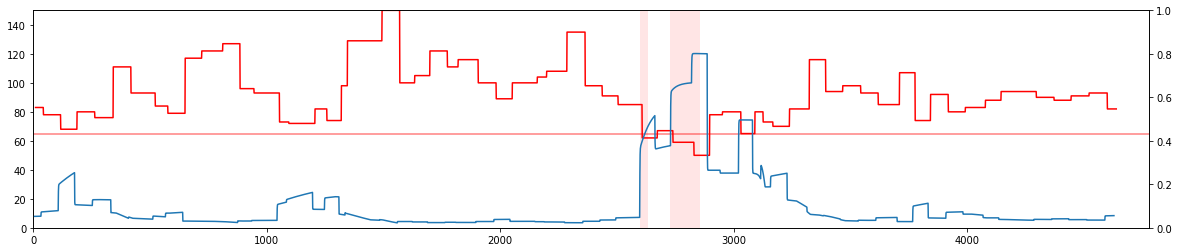

143/143 [==============================] - 2s 17ms/step
Print error: 5516	0.10567532283697773	


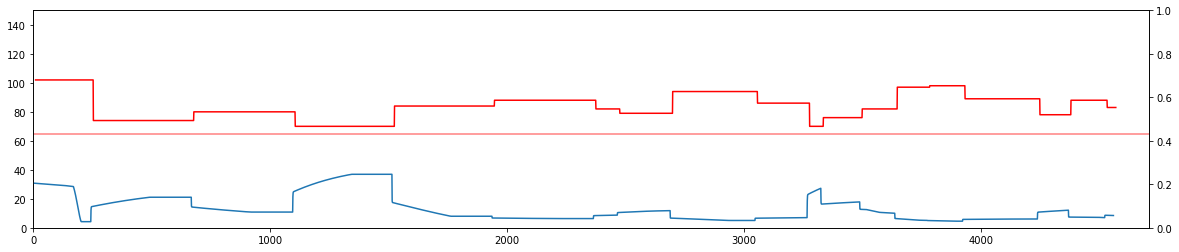

47/47 [==============================] - 1s 16ms/step
Print error: 5566	0.02483379170616436	


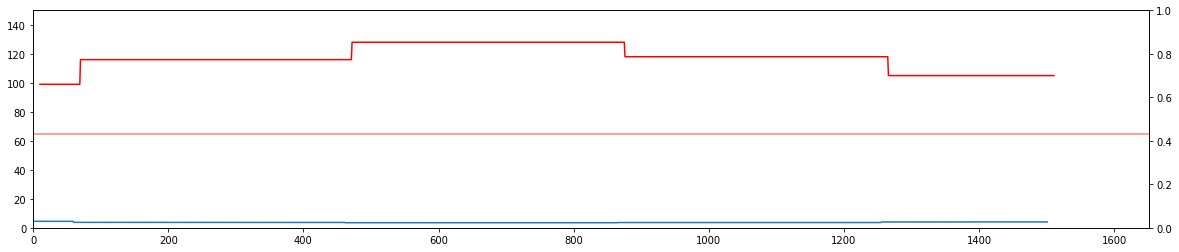

7/7 [==============================] - 0s 14ms/step
Print error: 5568	0.15915886327349646	


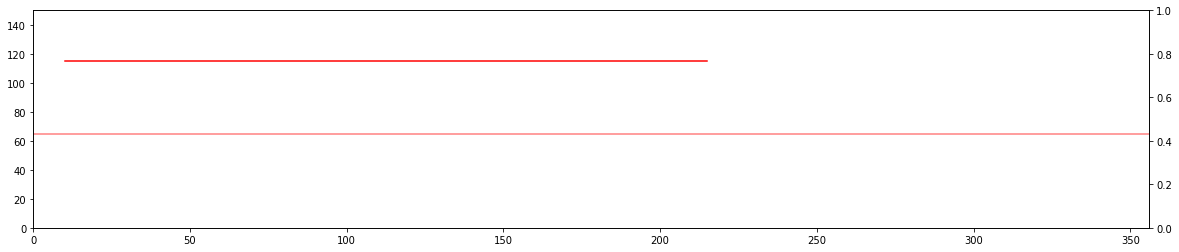

106/106 [==============================] - 2s 15ms/step
Print error: 5570	0.33757670378612054	


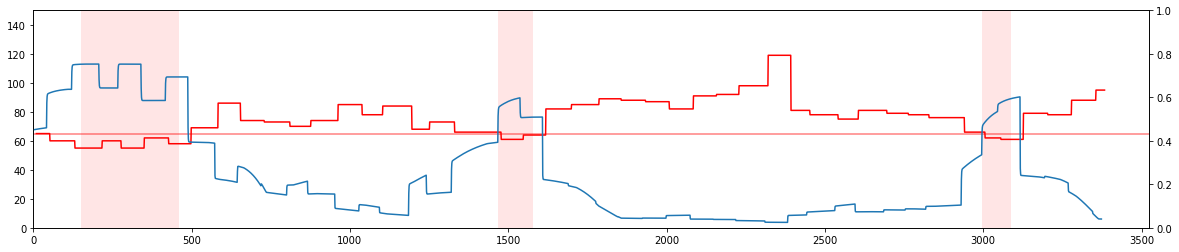

52/52 [==============================] - 1s 15ms/step
Print error: 5600	0.02945920555756563	


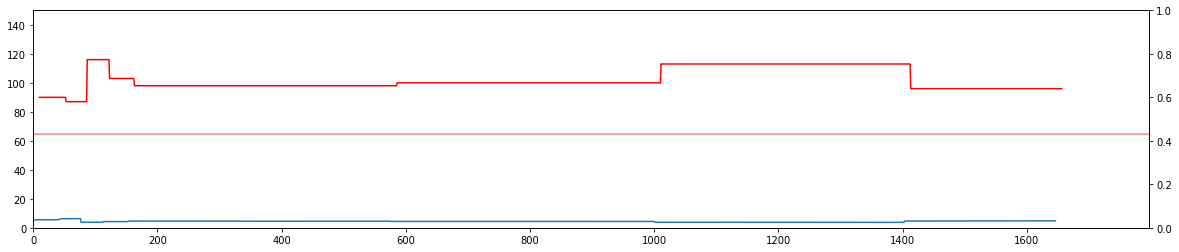

45/45 [==============================] - 1s 15ms/step
Print error: 5627	0.15950174457655764	


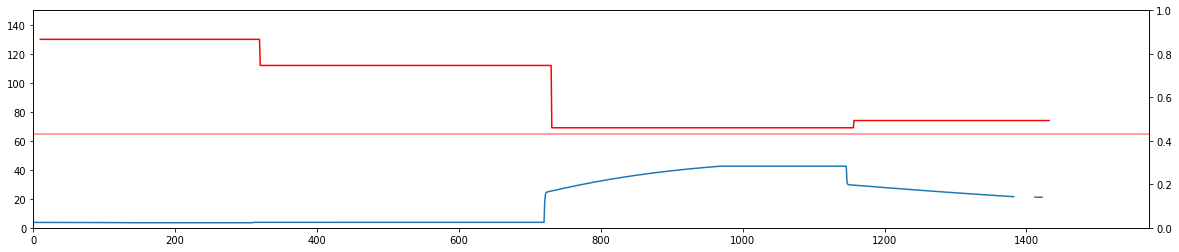

109/109 [==============================] - 2s 15ms/step
Print error: 5631	0.2518330665023555	


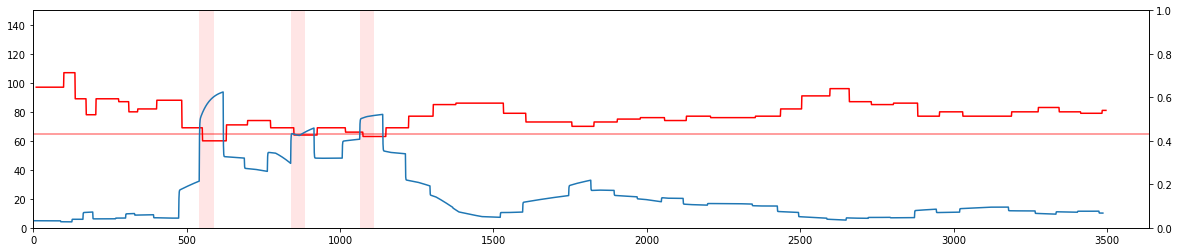

159/159 [==============================] - 2s 15ms/step
Print error: 5639	0.2792635410930935	


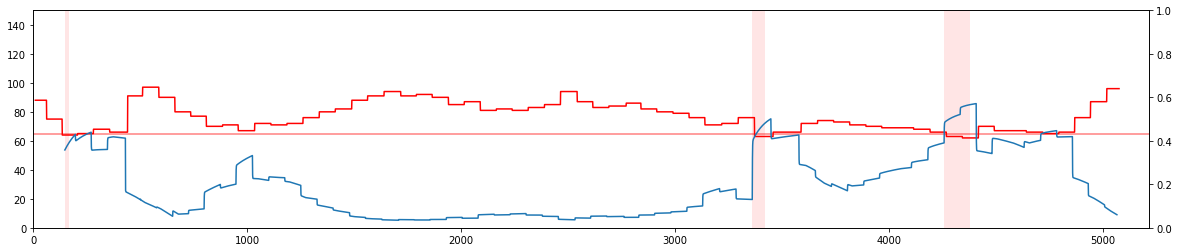

149/149 [==============================] - 2s 16ms/step
Print error: 5644	0.12479011975965784	


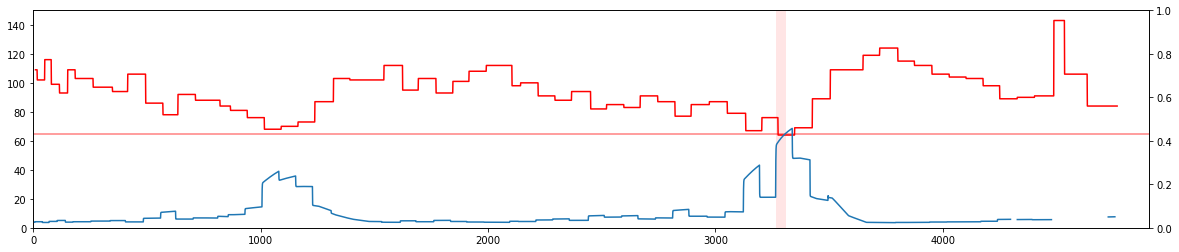

83/83 [==============================] - 1s 17ms/step
Print error: 5672	0.24560915449345996	


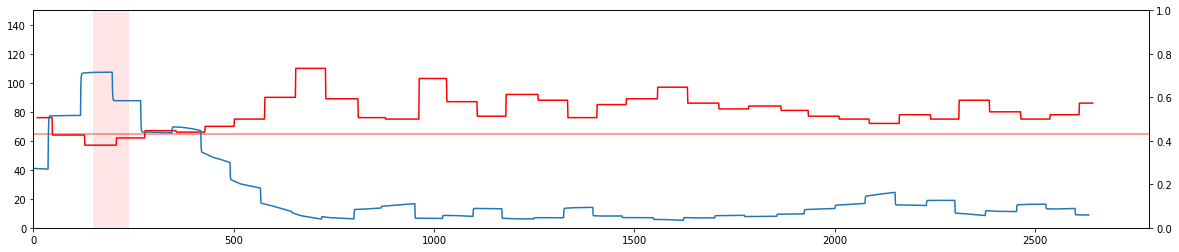

135/135 [==============================] - 2s 16ms/step
Print error: 5700	0.3656109179531823	


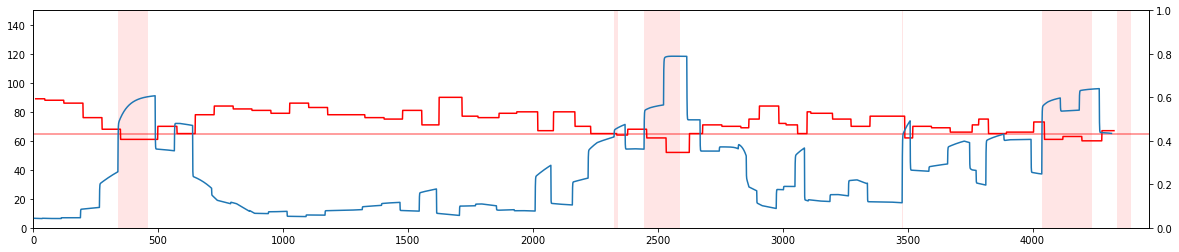

123/123 [==============================] - 2s 15ms/step
Print error: 5731	0.09014531504761446	


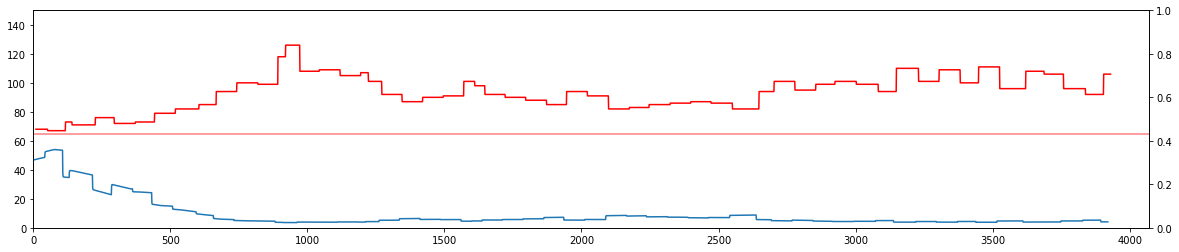

102/102 [==============================] - 2s 16ms/step
Print error: 5742	0.3641569391641992	


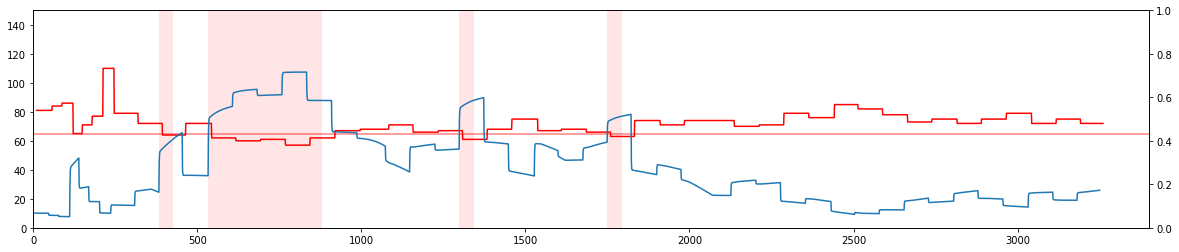

201/201 [==============================] - 3s 14ms/step
Print error: 5756	0.15755080322397128	


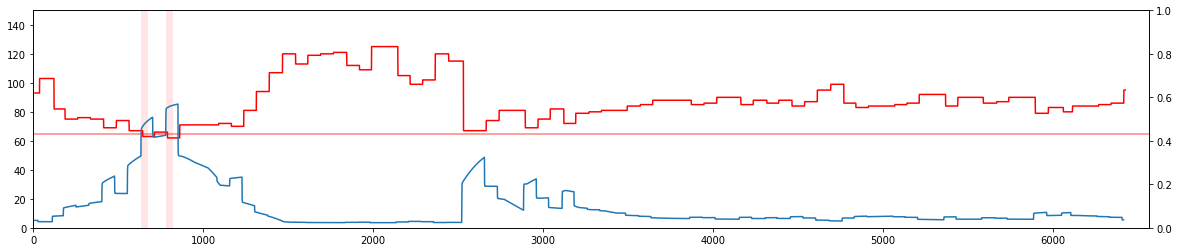

265/265 [==============================] - 4s 16ms/step
Print error: 5786	0.21136906415916604	


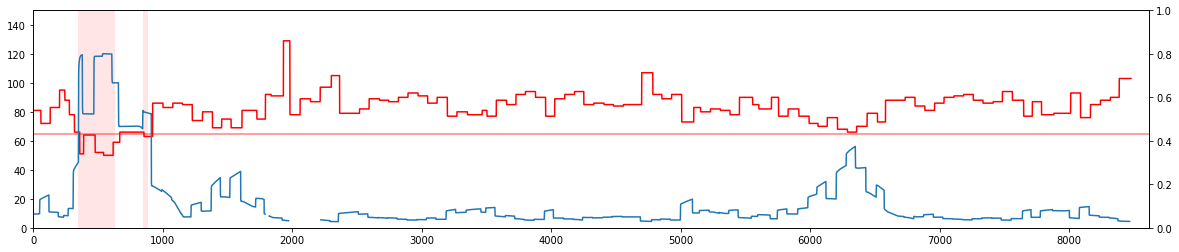

180/180 [==============================] - 3s 15ms/step
Print error: 5798	0.3361656279341392	


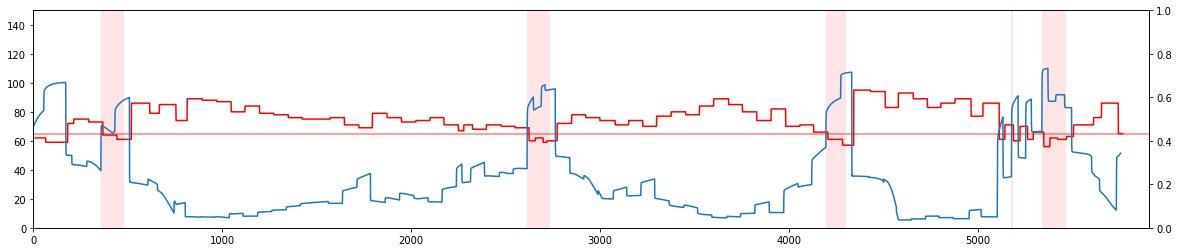

133/133 [==============================] - 2s 16ms/step
Print error: 5821	0.24479694648216188	


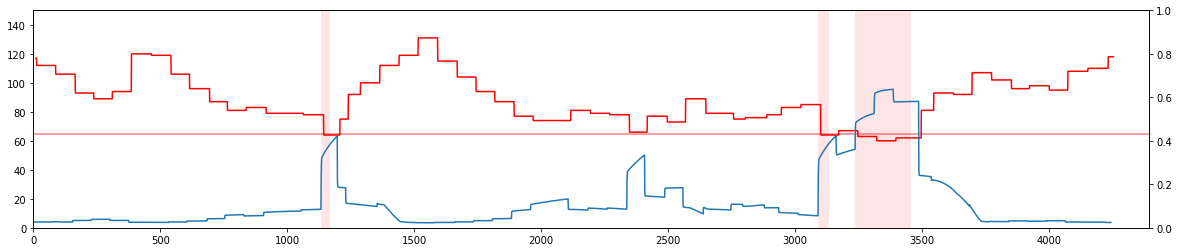

117/117 [==============================] - 2s 16ms/step
Print error: 5828	0.24846058984137265	


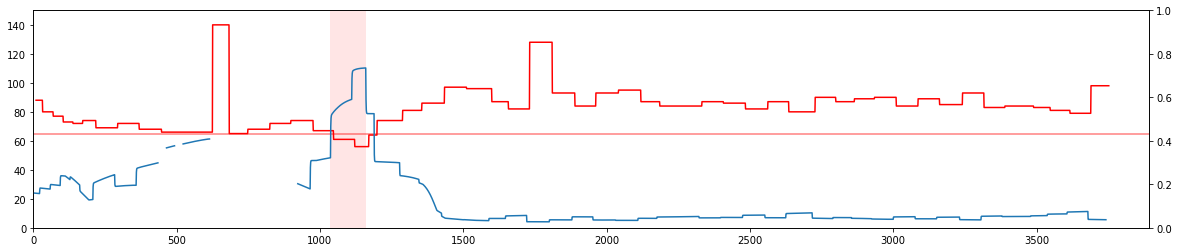

66/66 [==============================] - 1s 16ms/step
Print error: 5834	0.07908069665055417	


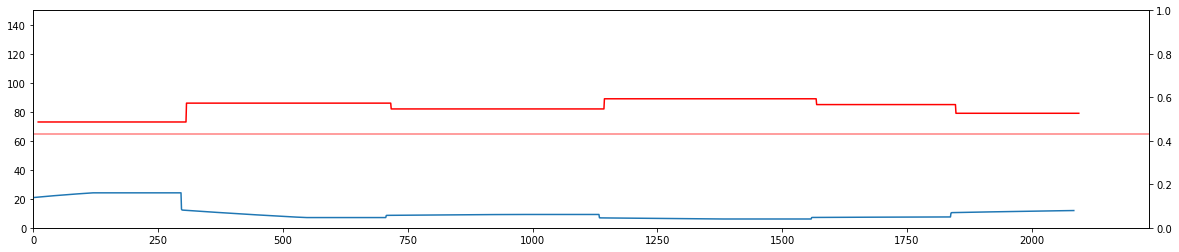

263/263 [==============================] - 4s 16ms/step
Print error: 5879	0.22802313692513082	


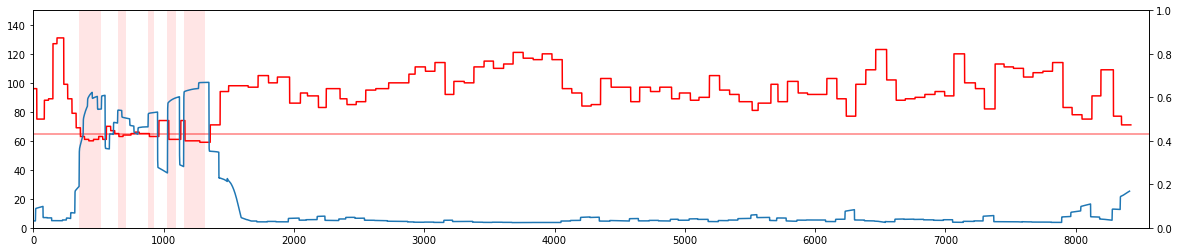

162/162 [==============================] - 3s 16ms/step
Print error: 5881	0.45302409659963405	


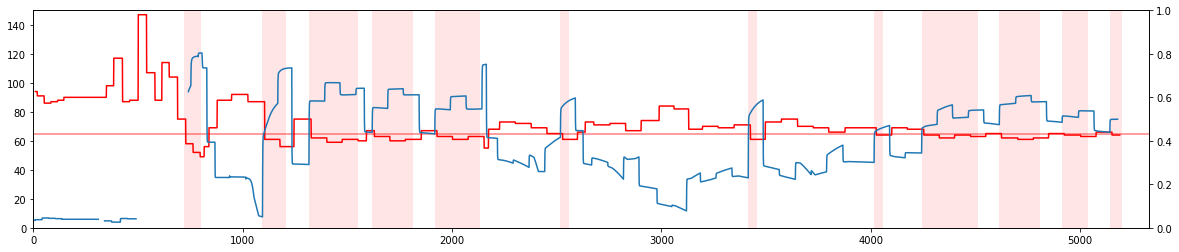

170/170 [==============================] - 3s 16ms/step
Print error: 5900	0.1990683024921641	


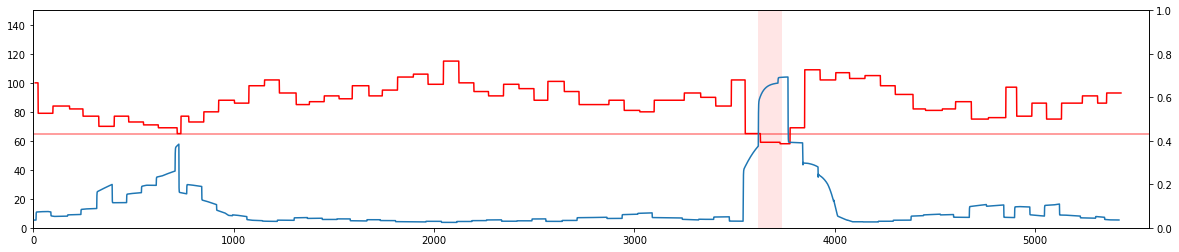

44/44 [==============================] - 1s 16ms/step
Print error: 5911	0.033163392261813675	


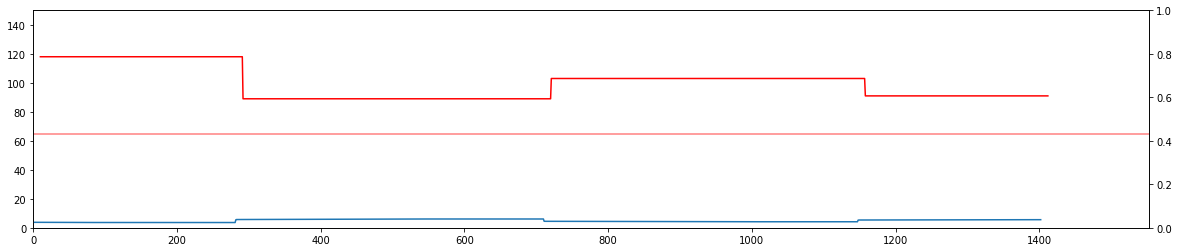

149/149 [==============================] - 2s 15ms/step
Print error: 5913	0.18569577917929234	


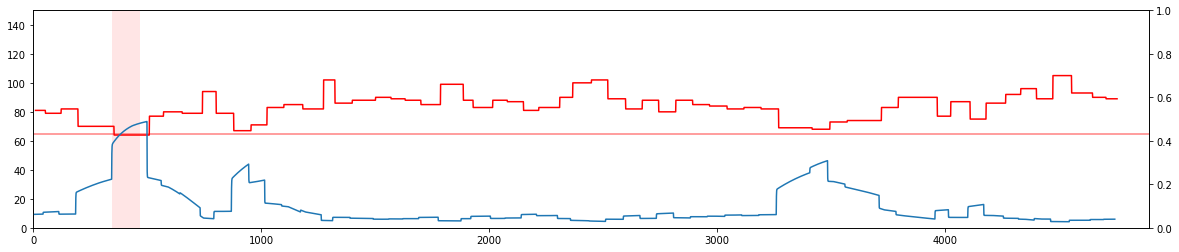

106/106 [==============================] - 2s 15ms/step
Print error: 5927	0.04132981814736289	


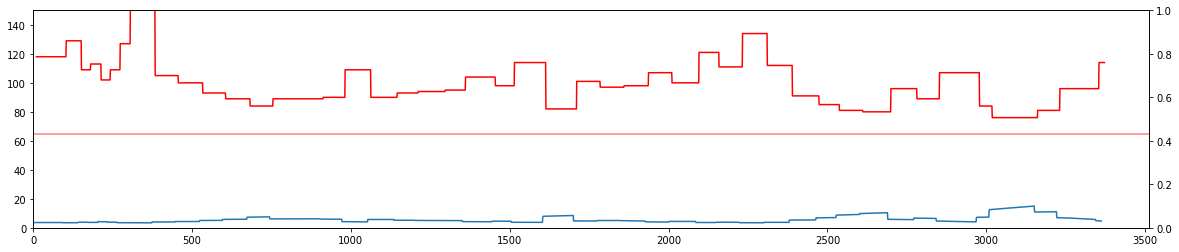

180/180 [==============================] - 3s 16ms/step
Print error: 5935	0.0445827715207365	


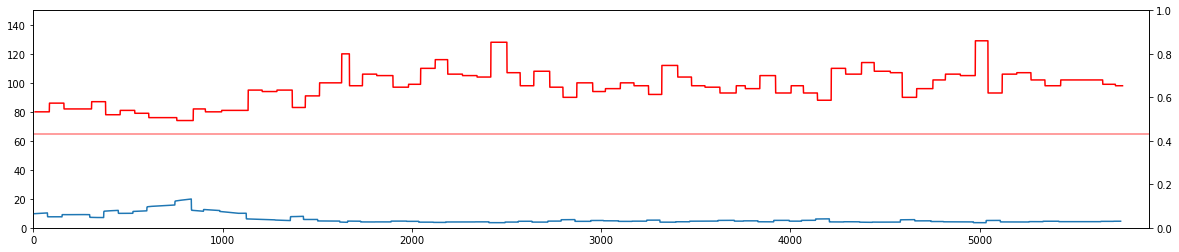

60/60 [==============================] - 1s 15ms/step
Print error: 5960	0.1593901465735703	


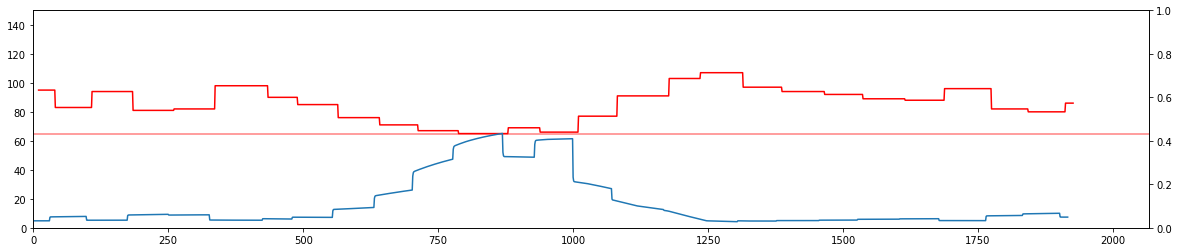

192/192 [==============================] - 3s 16ms/step
Print error: 5968	0.09448673918567008	


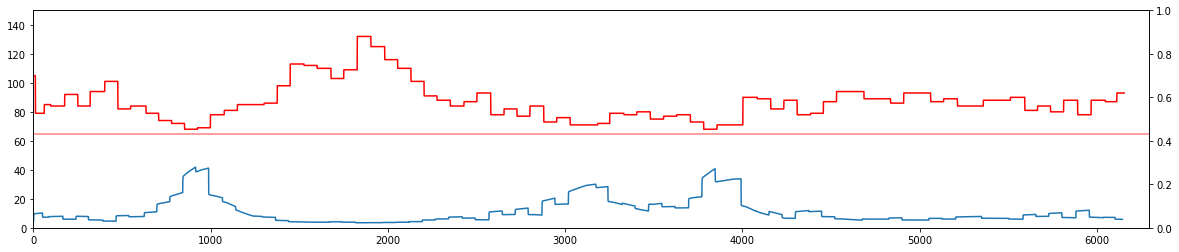

136/136 [==============================] - 2s 15ms/step
Print error: 5984	0.0857039360844319	


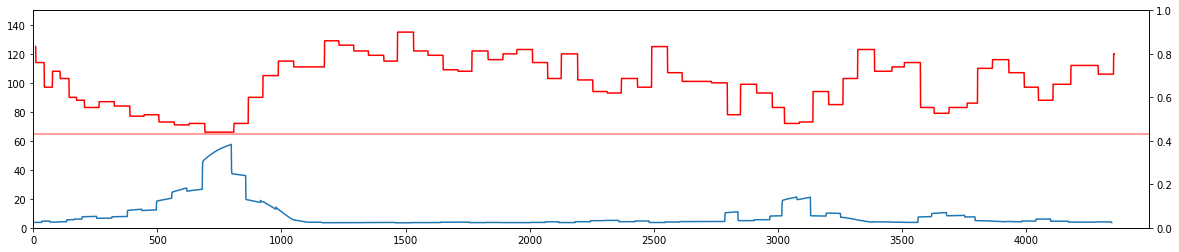

175/175 [==============================] - 3s 15ms/step
Print error: 6001	0.20459439584406666	


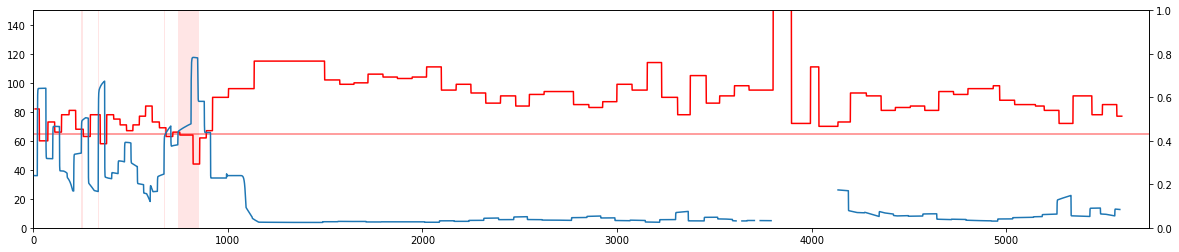

87/87 [==============================] - 1s 15ms/step
Print error: 6023	0.2707973679479781	


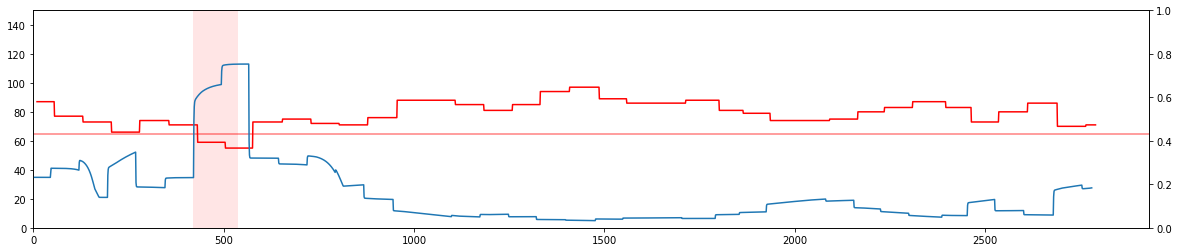

110/110 [==============================] - 2s 17ms/step
Print error: 6036	0.1628046579632315	


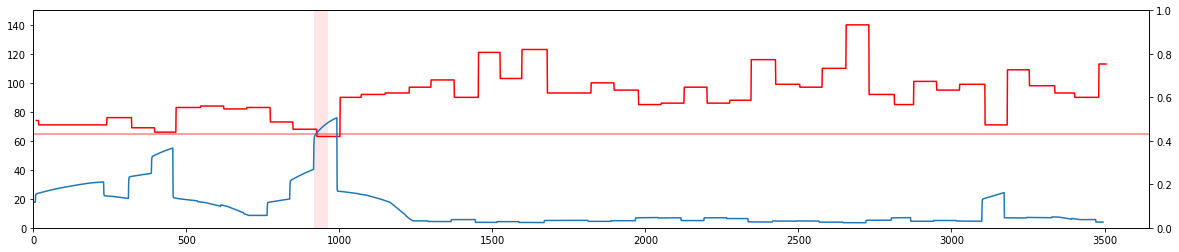

76/76 [==============================] - 1s 15ms/step
Print error: 6045	0.11641588491210562	


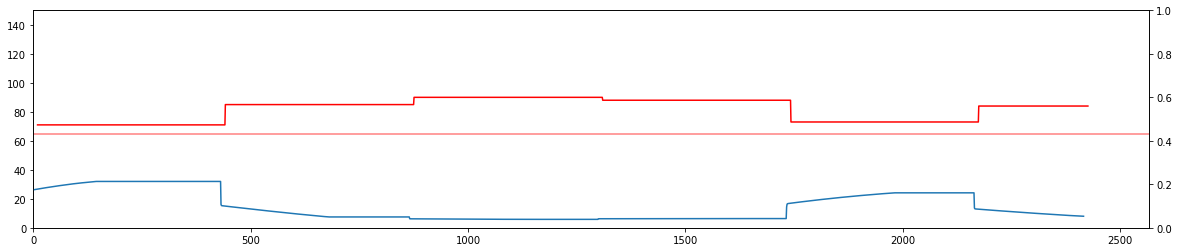

45/45 [==============================] - 1s 16ms/step
Print error: 6116	0.07654840378520432	


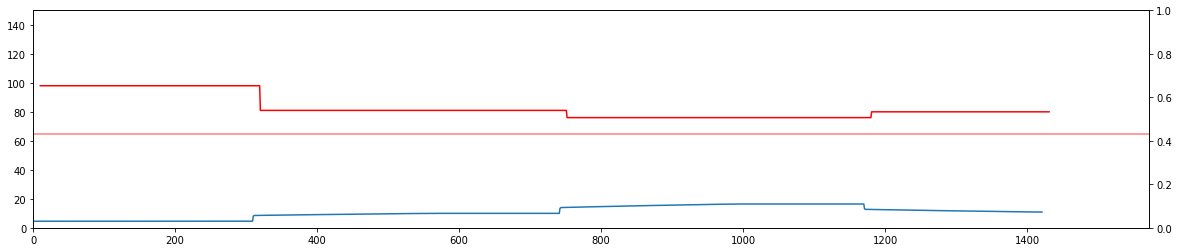

110/110 [==============================] - 2s 15ms/step
Print error: 6137	0.17532359522458404	


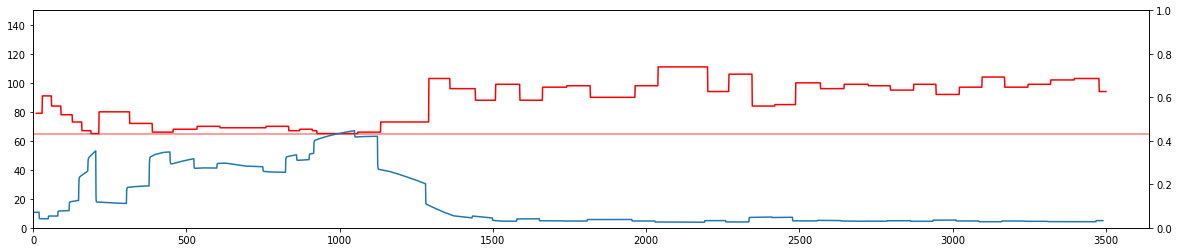

239/239 [==============================] - 4s 16ms/step
Print error: 6146	0.3631444488871622	


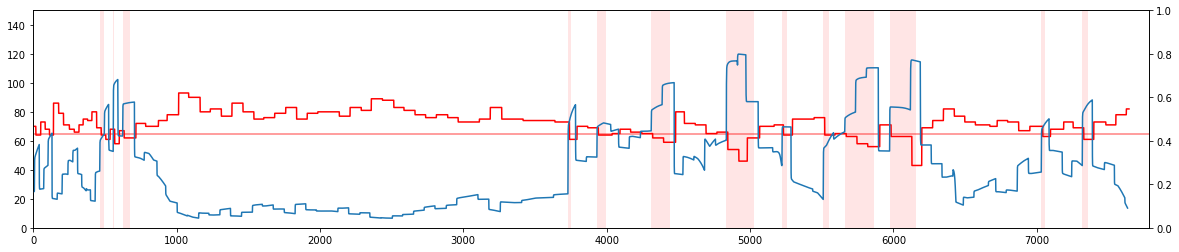

33/33 [==============================] - 1s 18ms/step
Print error: 6210	0.05599316966229461	


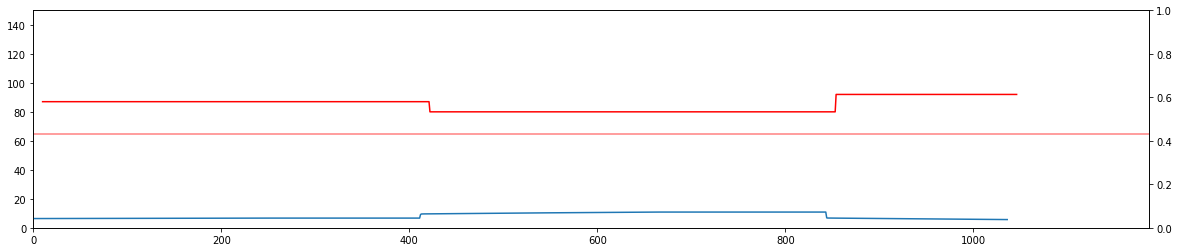

37/37 [==============================] - 1s 16ms/step
Print error: 6214	0.10284694136058482	


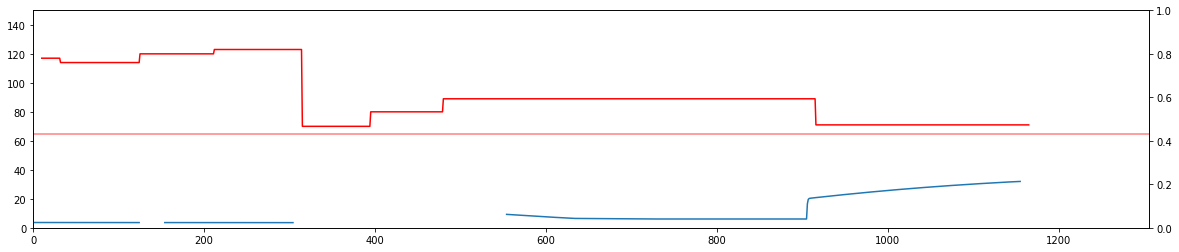

165/165 [==============================] - 3s 16ms/step
Print error: 6225	0.19115740306220239	


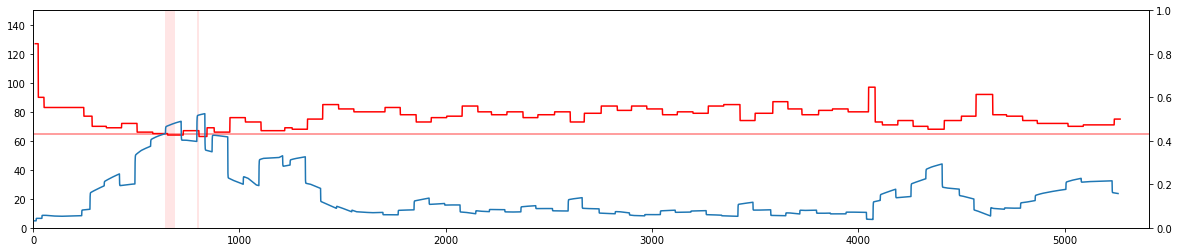

129/129 [==============================] - 2s 16ms/step
Print error: 6226	0.3988218136996996	


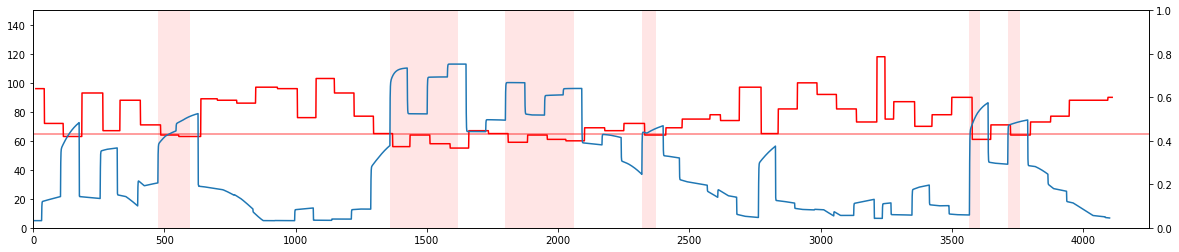

236/236 [==============================] - 4s 15ms/step
Print error: 6253	0.04904414077932216	


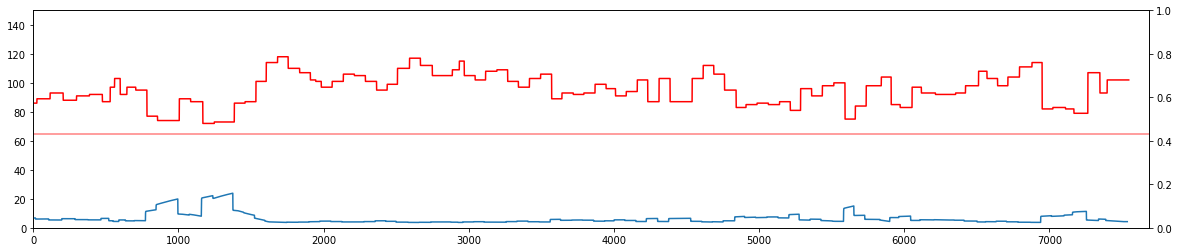

96/96 [==============================] - 2s 15ms/step
Print error: 6263	0.08909435894489415	


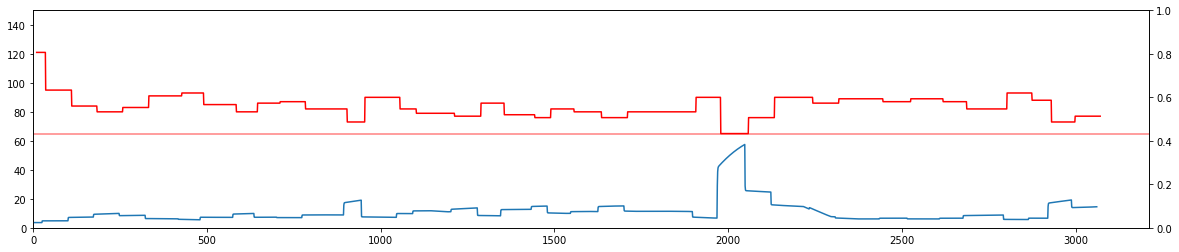

187/187 [==============================] - 3s 16ms/step
Print error: 6272	0.23874916972769925	


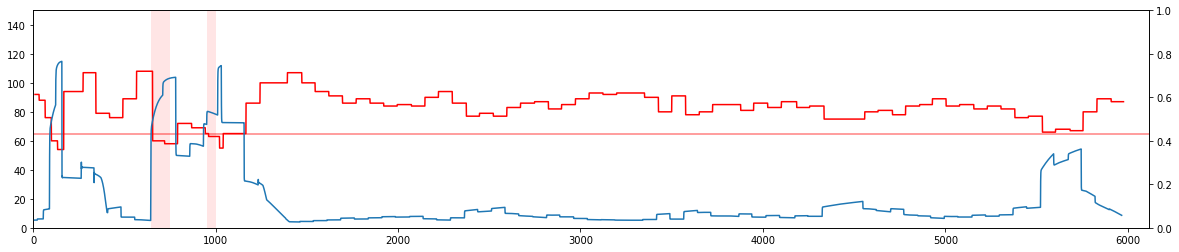

216/216 [==============================] - 3s 15ms/step
Print error: 6294	0.14855044861171743	


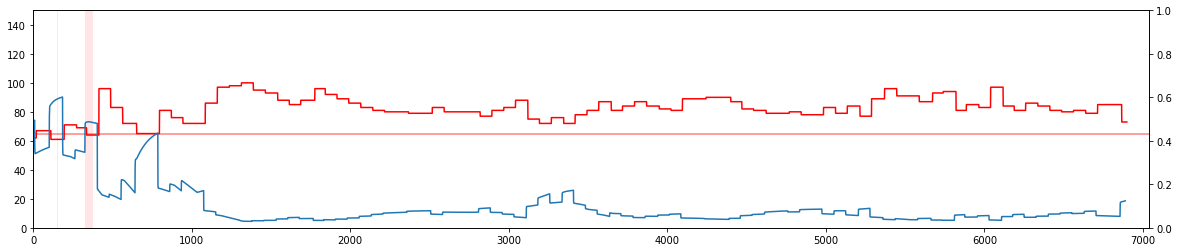

44/44 [==============================] - 1s 17ms/step
Print error: 6317	0.15190603266882716	


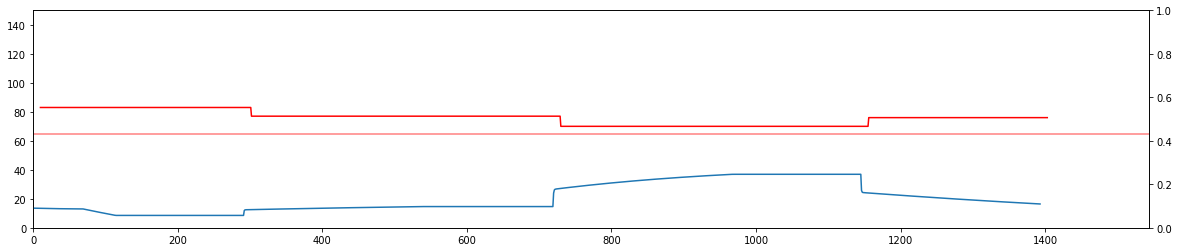

121/121 [==============================] - 2s 15ms/step
Print error: 6325	0.1802701108714418	


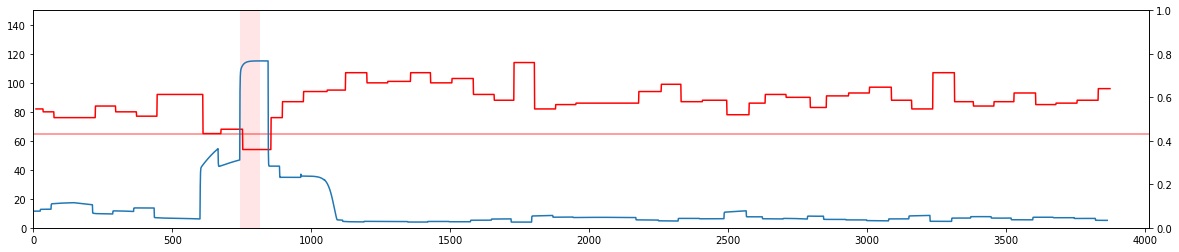

101/101 [==============================] - 2s 15ms/step
Print error: 6352	0.36349134625230883	


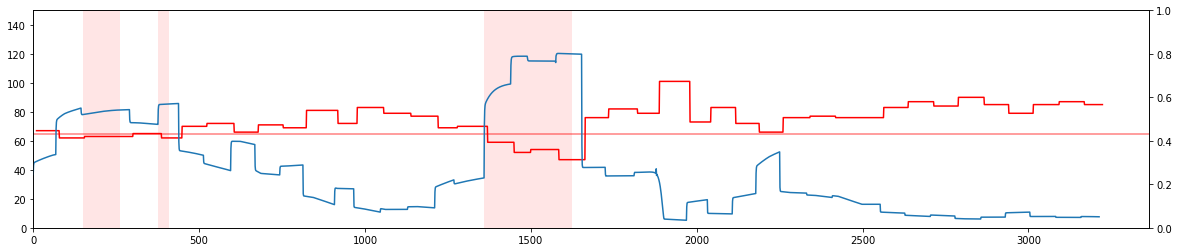

323/323 [==============================] - 5s 15ms/step
Print error: 6356	0.22586644885011103	


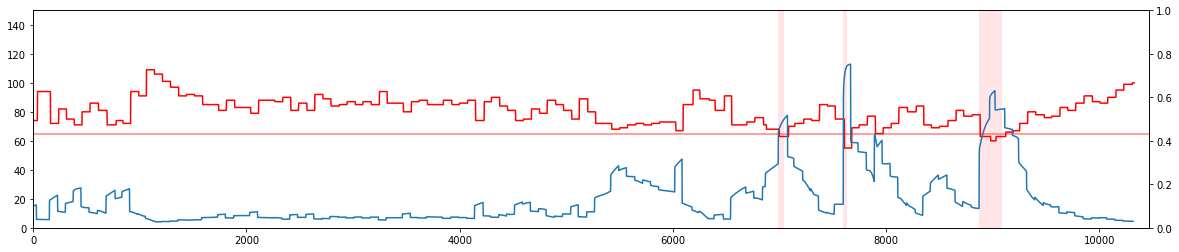

86/86 [==============================] - 1s 16ms/step
Print error: 6360	0.38192876677656035	


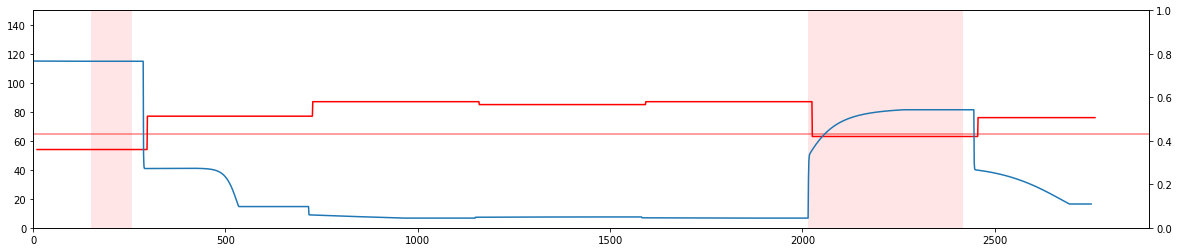

In [34]:
for caseid in caseids_test:
    case_mask = (c == caseid)
    case_len = np.sum(case_mask)
    if case_len == 0:
        continue

    case_x = x[case_mask]
    case_y = y[case_mask]
    case_valid_mask = valid_mask[case_mask]
    
    # calculate error for this case
    case_predy = model.predict(case_x).flatten()
    case_rmse = np.nanmean((case_y - case_predy) ** 2) ** 0.5
    print('Print error:', '{}\t{}\t'.format(caseid, case_rmse))

    # draw
    plt.figure(figsize=(20, 4))
    plt.xlim([0, case_len + MINUTES_AHEAD * 30])
    t = np.arange(0, case_len)

    # red bars for the event
    ax1 = plt.gca()
    for i in range(len(case_y)):
        if case_y[i]:
            ax1.axvspan(i + MINUTES_AHEAD * 30, i + MINUTES_AHEAD * 30 + 1, color='r', alpha=0.1, lw=0)

    # 65 mmHg bar
    ax1.axhline(y=65, color='r', alpha=0.5)
    ax1.plot(t + 10, case_x[:,-1], color='r')
    ax1.set_ylim([0, 150])

    ax2 = ax1.twinx()
    
    # draw valid samples
    case_predy[~case_valid_mask] = np.nan
    ax2.plot(t, case_predy)
    ax2.set_ylim([0, 1])
    
    # save
    plt.show()

In [37]:
import scipy.stats as stat
from tableone import TableOne

In [39]:
tbl = TableOne(isin, columns=list(isin.columns), missing=False, htest_name=True)
pd.set_option('display.max_rows', 500)
tbl

Overall
n                                                         1394083
caseid, n (%)                 1026                     3809 (0.3)
                              1081                     3662 (0.3)
                              1082                     5803 (0.4)
                              109                      6920 (0.5)
                              1104                     5798 (0.4)
                              1130                     3144 (0.2)
                              1134                     3799 (0.3)
                              1137                     3802 (0.3)
                              116                       907 (0.1)
                              1167                     3990 (0.3)
                              1175                     4316 (0.3)
                              1189                     2624 (0.2)
                              1201                     1745 (0.1)
                              1210                     5585 (0.4)
                              1214                     3585 (0.3)
                              1236                     1860 (0.1)
                              124                      1799 (0.1)
                              1255                     3671 (0.3)
                              1308                     4305 (0.3)
                              1315                     1787 (0.1)
                              1359                     2599 (0.2)
                              1378                     6636 (0.5)
                              140                      2926 (0.2)
                              1401                     6023 (0.4)
                              1405                     7733 (0.6)
                              1421                     2859 (0.2)
                              1422                     2312 (0.2)
                              1434                      146 (0.0)
                              1435                     4931 (0.4)
                              1450                     8889 (0.6)
                              1453                     7559 (0.5)
                              1467                     3741 (0.3)
                              1476                     4699 (0.3)
                              1479                     3266 (0.2)
                              1502                     4776 (0.3)
                              1508                     5057 (0.4)
                              1526                     2231 (0.2)
                              1562                      139 (0.0)
                              1591                     1955 (0.1)
                              1655                    10237 (0.7)
                              166                      2780 (0.2)
                              1666                      535 (0.0)
                              1694                     2338 (0.2)
                              1718                     2792 (0.2)
                              1721                     4884 (0.4)
                              1731                     4166 (0.3)
                              1741                     9671 (0.7)
                              1742                     5412 (0.4)
                              1766                      881 (0.1)
                              1788                     3356 (0.2)
                              1796                     3345 (0.2)
                              1803                     8162 (0.6)
                              1813                     3887 (0.3)
                              1824                     3584 (0.3)
                              1854                     2092 (0.2)
                              1859                     6080 (0.4)
                              1873                     2763 (0.2)
                              1880                     6099 (0.4)
                              1928                     2554 (0.2)
                              19

In [35]:
isin[]

caseid   age  height  weight   bmi  asa  preop_htn  preop_dm  \
347          21  69.0   155.1    61.6  25.6  1.0          0         0   
348          21  69.0   155.1    61.6  25.6  1.0          0         0   
349          21  69.0   155.1    61.6  25.6  1.0          0         0   
350          21  69.0   155.1    61.6  25.6  1.0          0         0   
351          21  69.0   155.1    61.6  25.6  1.0          0         0   
...         ...   ...     ...     ...   ...  ...        ...       ...   
2367227    6360  41.0   165.2    53.9  19.8  1.0          0         0   
2367228    6360  41.0   165.2    53.9  19.8  1.0          0         0   
2367229    6360  41.0   165.2    53.9  19.8  1.0          0         0   
2367230    6360  41.0   165.2    53.9  19.8  1.0          0         0   
2367231    6360  41.0   165.2    53.9  19.8  1.0          0         0   

         preop_hb  preop_plt  preop_pt  preop_aptt  preop_na  preop_k  \
347          13.3      304.0     116.0        32.9     141.0      4.4   
348          13.3      304.0     116.0        32.9     141.0      4.4   
349          13.3      304.0     116.0        32.9     141.0      4.4   
350          13.3      304.0     116.0        32.9     141.0      4.4   
351          13.3      304.0     116.0        32.9     141.0      4.4   
...           ...        ...       ...         ...       ...      ...   
2367227      11.7      319.0      88.0        30.9     139.0      3.6   
2367228      11.7      319.0      88.0        30.9     139.0      3.6   
2367229      11.7      319.0      88.0        30.9     139.0      3.6   
2367230      11.7      319.0      88.0        30.9     139.0      3.6   
2367231      11.7      319.0      88.0        30.9     139.0      3.6   

         preop_gluc  preop_alb  preop_ast  preop_alt  preop_bun  preop_cr  \
347            73.0        4.6       20.0       18.0       15.0      0.65   
348            73.0        4.6       20.0       18.0       15.0      0.65   
349            73.0        4.6       20.0       18.0       15.0      0.65   
350            73.0        4.6       20.0       18.0       15.0      0.65   
351            73.0        4.6       20.0       18.0       15.0      0.65   
...             ...        ...        ...        ...        ...       ...   
2367227       106.0        3.5       12.0        4.0        5.0      0.53   
2367228       106.0        3.5       12.0        4.0        5.0      0.53   
2367229       106.0        3.5       12.0        4.0        5.0      0.53   
2367230       106.0        3.5       12.0        4.0        5.0      0.53   
2367231       106.0        3.5       12.0        4.0        5.0      0.53   

         intraop_ebl  intraop_uo  intraop_crystalloid  intraop_ppf  \
347            300.0       350.0                750.0          100   
348            300.0       350.0                750.0          100   
349            300.0       350.0                750.0          100   
350            300.0       350.0                750.0          100   
351            300.0       350.0                750.0          100   
...              ...         ...                  ...          ...   
2367227        400.0       180.0               1800.0          100   
2367228        400.0       180.0               1800.0          100   
2367229        400.0       180.0               1800.0          100   
2367230        400.0       180.0               1800.0          100   
2367231        400.0       180.0               1800.0          100   

         intraop_ftn  intraop_rocu  intraop_eph  Primus/MAC  Primus/PEEP_MBAR  \
347              100           100           10         0.0               5.0   
348              100           100           10         0.0               5.0   
349              100           100           10         0.0               5.0   
350              100           100           10         0.0               5.0   
351              100           100           10         0.0               5.0   
...